# Penguins Species Dataset

## Overview

The "Penguins Species" dataset contains information about various penguin species, with measurements related to their physical characteristics. 


## Objective

The objective of analyzing this dataset could be to understand the relationships between the physical characteristics of penguins and their gender, explore patterns or clusters within the data, or build predictive models.



# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# 1 Data Overview

#### 1.1 Load the dataset into a dataframe and inital inspection

In [2]:
df = pd.read_csv("../Dataset/penguins_size.csv")
df = df[df['sex'] != '.'] #There is a row where sex = '.', so filtering it out
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


# 3. Data Exploration and Visualization

In [4]:
def annotate_bars():
    for p in plt.gca().patches:
        plt.gca().annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 4), textcoords='offset points')


#### 3.1 Gender Distribution

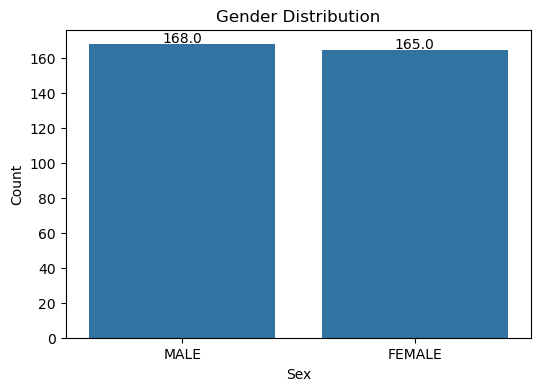

In [5]:

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
annotate_bars()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

#### Observation: Gender Distribution in the Dataset 📊

In the dataset:
- 🚹 **Males:** 168
- 🚺 **Females:** 165

So, there are 🚹 **168 - 165 = 3** more male penguins than females penguins in the dataset. While it's not perfectly uniform, the difference isn't drastic to worry about.

#### 3.2 Target Distribution

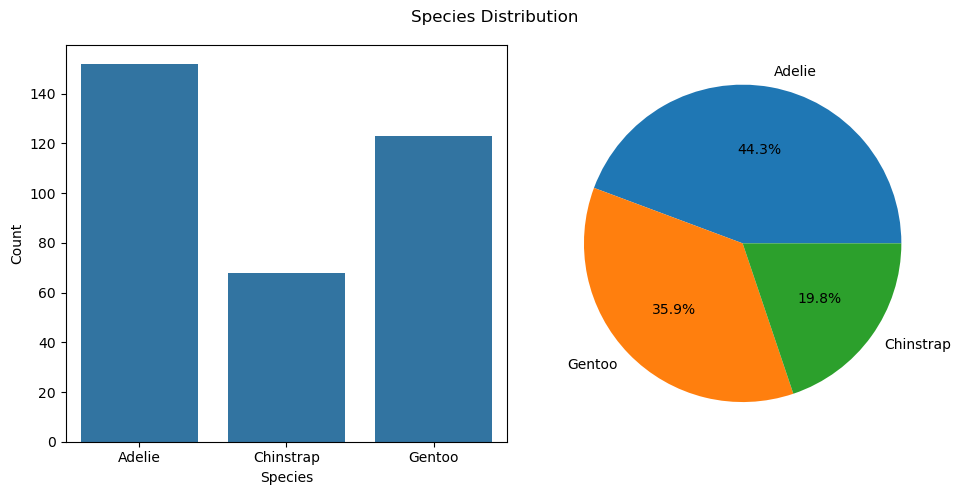

In [6]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Species Distribution")
# Bar chart for species distribution
sns.countplot(ax=axes[0], x='species', data=df)
annotate_bars()
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')



# Pie chart for species distribution
species_counts = df['species'].value_counts()
axes[1].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')

plt.tight_layout()
plt.show()

#### Penguin Species Distribution 🐧

In the dataset, the distribution of penguin species is as follows:

- 🐧 **Adelie Species:** 152
- 🐧 **Chinstrap Species:** 68
- 🐧 **Gentoo Species:** 123

Among these species:
- The **highest** count is for the **Adelie species** with 152 individuals.
- The **lowest** count is for the **Chinstrap species** with 68 individuals, which is almost half of the counts for the other species, indicating a substantial difference.

**Dataset Imbalance Consideration:**
    `The dataset exhibits a notable imbalance in the number of observations among penguin species, with the Chinstrap species having significantly fewer instances compared to Adelie and Gentoo. Model training and evaluation should account for this imbalance to ensure robust predictions across all species.`



## 3.3 Island Distribution

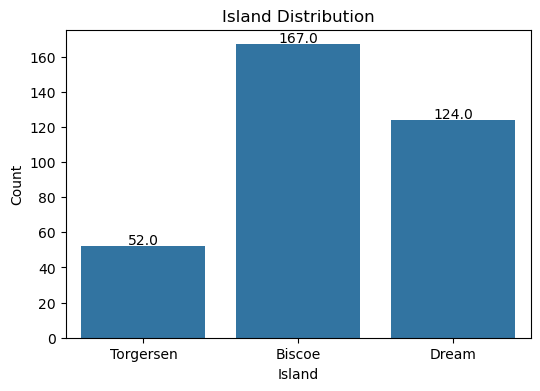

In [7]:
plt.figure(figsize=(6,4))
plt.title("Island Distribution")
sns.countplot(data = df, x = 'island')
annotate_bars()
plt.xlabel("Island")
plt.ylabel("Count")
plt.show()

## Observation:
In the dataset, the distribution of penguins across different islands is as follows:

- 🐧 **Torgersen Island:** 52
- 🐧 **Biscoe Island:** 167
- 🐧 **Dream Island:** 124

Among these islands:
- The **highest** count is for **Biscoe Island** with 168 individuals.
- The **lowest** count is for **Torgersen Island** with 52 individuals, which is less than half of the counts for the other islands, indicating a substantial difference.

## 3.4 Body Measurement and Mass Distribtion

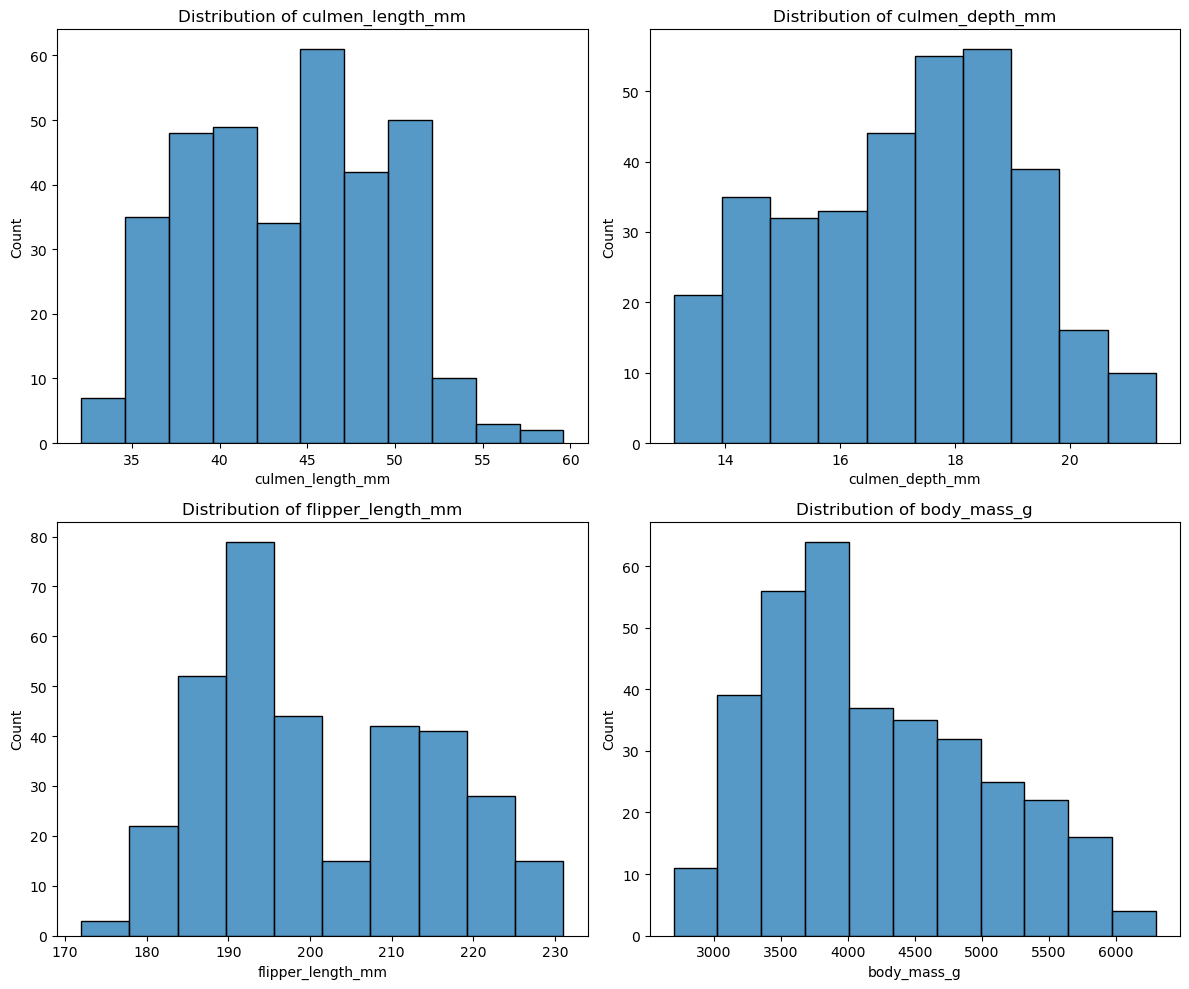

In [8]:
measured_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(measured_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


#### 3.5 Average Measurements by Sex

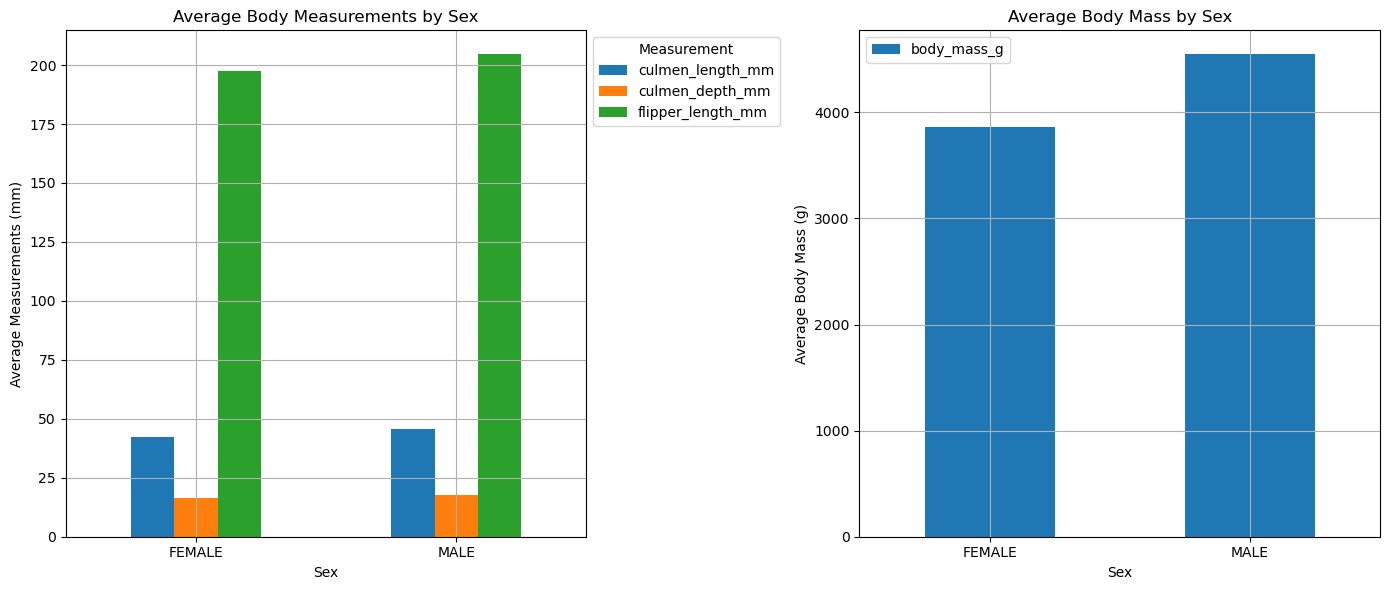

In [9]:
# Generate average measurements by sex
average_measurements_by_sex = (
    df.groupby("sex")[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
    .mean()
    .reset_index()
)


# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average body measurements (culmen length, depth, and flipper length)
average_measurements_by_sex.set_index('sex')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].plot(
    kind='bar', rot=0, ax=axes[0]
)
annotate_bars()
axes[0].set_title('Average Body Measurements by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Measurements (mm)')
axes[0].legend(title='Measurement', bbox_to_anchor=(1, 1))
axes[0].grid()

# Plotting average body mass
average_measurements_by_sex.set_index('sex')[['body_mass_g']].plot(
    kind='bar', rot=0, ax=axes[1]
)
axes[1].set_title('Average Body Mass by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Average Body Mass (g)')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

#### Gender Comparison in Penguin Body Measurements

Upon analyzing the body measurements of male and female penguins, a noteworthy observation emerges. Both genders exhibit almost similar body measurements, with a slight distinction in weight. Males tend to be slightly heavier compared to females.

This insight provides valuable information about the physical characteristics of male and female penguins in the dataset.


## 3.6 Average Measurement by Species

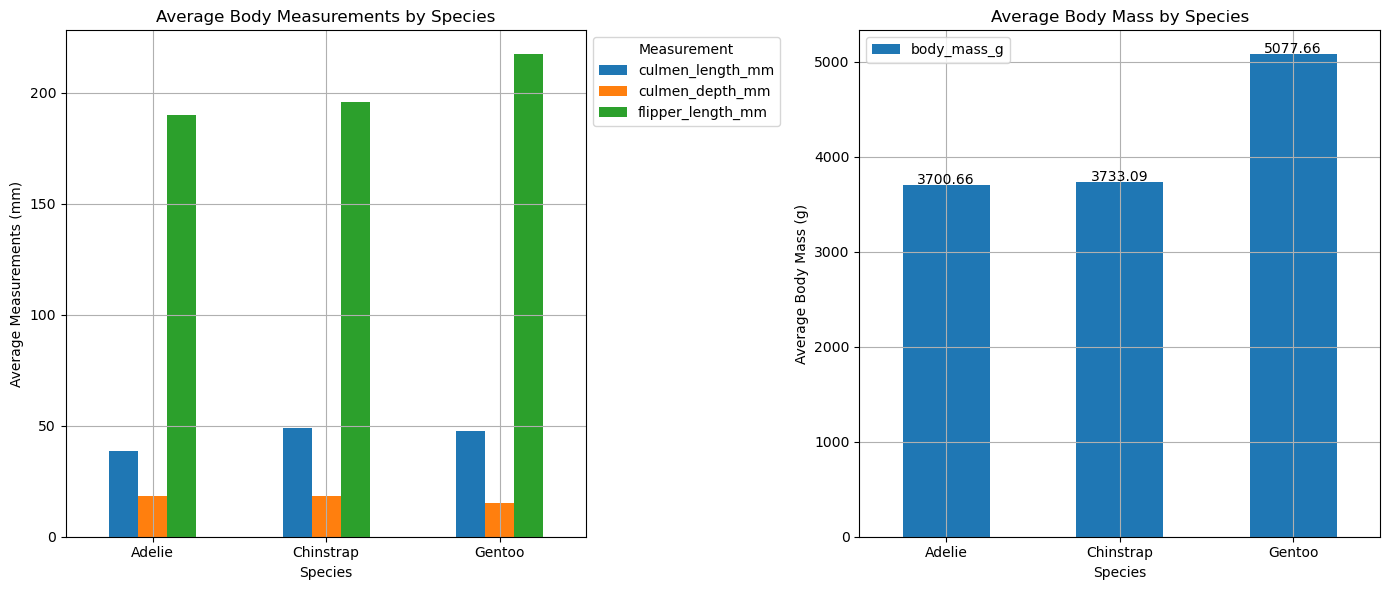

In [10]:
# Generate average measurements by species
average_measurements_by_species = (
    df.groupby("species")[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
    .mean()
    .reset_index()
)


# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average body measurements (culmen length, depth, and flipper length)
average_measurements_by_species.set_index('species')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].plot(
    kind='bar', rot=0, ax=axes[0]
)
axes[0].set_title('Average Body Measurements by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Average Measurements (mm)')
axes[0].legend(title='Measurement', bbox_to_anchor=(1, 1))
axes[0].grid()

# Plotting average body mass
average_measurements_by_species.set_index('species')[['body_mass_g']].plot(
    kind='bar', rot=0, ax=axes[1]
)
annotate_bars()
axes[1].set_title('Average Body Mass by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Average Body Mass (g)')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

## 3.7 Average Measurement by Island

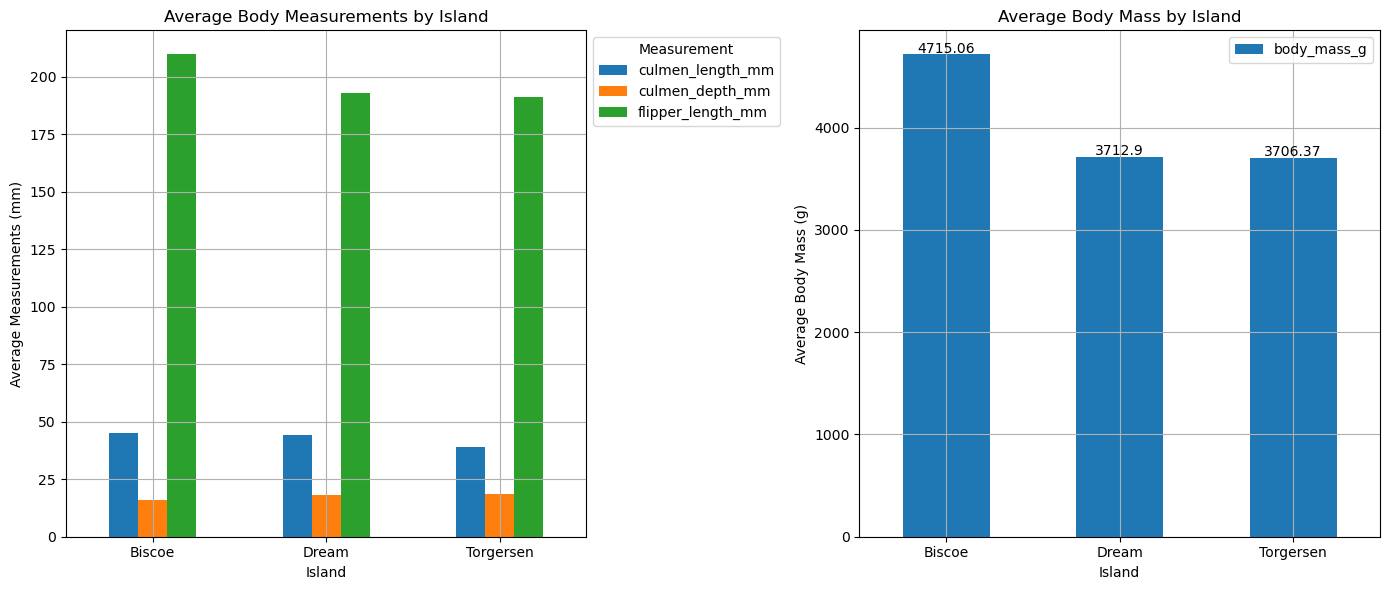

In [11]:
# Generate average measurements by island
average_measurements_by_island = (
    df.groupby("island")[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
    .mean()
    .reset_index()
)


# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average body measurements (culmen length, depth, and flipper length)
average_measurements_by_island.set_index('island')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].plot(
    kind='bar', rot=0, ax=axes[0]
)
axes[0].set_title('Average Body Measurements by Island')
axes[0].set_xlabel('Island')
axes[0].set_ylabel('Average Measurements (mm)')
axes[0].legend(title='Measurement', bbox_to_anchor=(1, 1))
axes[0].grid()

# Plotting average body mass
average_measurements_by_island.set_index('island')[['body_mass_g']].plot(
    kind='bar', rot=0, ax=axes[1]
)
annotate_bars()
axes[1].set_title('Average Body Mass by Island')
axes[1].set_xlabel('Island')
axes[1].set_ylabel('Average Body Mass (g)')
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights: 📊

A closer examination of the penguin measurements across the three islands reveals a remarkable consistency in most attributes. Notably, the body mass stands out as significantly larger for penguins from `Biscoe Island`.


## 3.8 <span style="color: red;">🐧 The Million-Dollar Question! 💰</span>  
#### <span style="color: blue;">Does flipper length contribute to body mass?</span>  
For example, could the difference in male and female body mass be partially explained by the slightly larger flipper size in males?

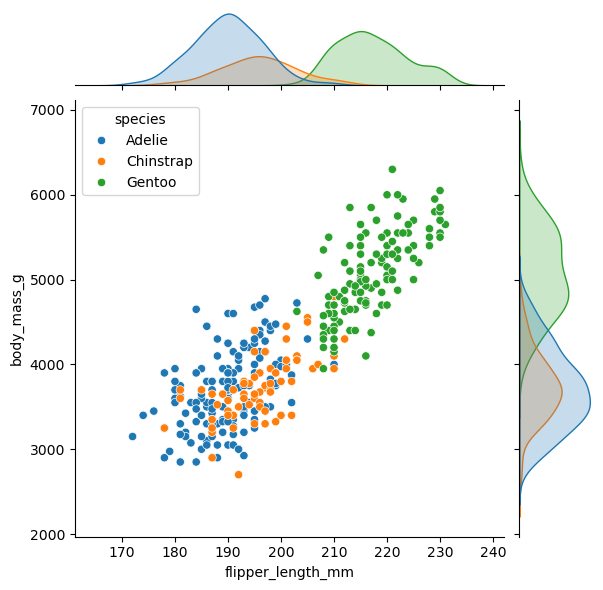

In [12]:
# Ensure 'species' is a categorical type
df['species'] = df['species'].astype('category')
sns.jointplot(data = df, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species')
plt.show()

### 🔵 **Key Observation: Body Mass vs. Flipper Length**  
<span style="color: #2E86C1;">**We observe a clear linear relationship**</span> between body mass and flipper length.  
🔍 **Next Step:** We will strengthen this finding with a **correlation analysis**

---

### 🟢 **Standout Species: Gentoo Penguins**  
<span style="color: #28B463;">**`Gentoo` penguins**</span> exhibit:  
- 📏 **Longer flippers**  
- ⚖️ **Higher body mass**  
❗ *This raises a critical follow-up question:*  <ins style="color: #C0392B;">**Are there noticeably more male Gentoo samples in the dataset compared to females?**</ins>  

In [13]:
corr = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
corr['body_mass_g']

culmen_length_mm     0.595476
culmen_depth_mm     -0.470963
flipper_length_mm    0.870956
body_mass_g          1.000000
Name: body_mass_g, dtype: float64

The high correlation between `flipper_length_mm` and `body_mass_g` (0.871) confirms our earlier hypothesis that flipper length has a significant influence on body mass. Combined with the visualization, we can conclude that flipper length is a critical factor in determining a penguin's body mass, likely more so than culmen measurements. Additionally, the slight differences in male and female flipper lengths could explain why males tend to be heavier.

However now lets focus on the Male Feamle Gentoo Distrubution.

In [14]:
df[df['species'] == 'Gentoo'].groupby('sex').size()

sex
FEMALE    58
MALE      61
dtype: int64

**Gentoo Sample Sizes**:
  - <span style="color: #3498DB;">♂️ Males: 65</span>  
  - <span style="color: #E74C3C;">♀️ Females: 58</span>  

The fact that there are more male Gentoo penguins (61 males vs. 58 females) could indeed contribute to the observed trend of higher average body mass in males. If there are more males in the sample, it would naturally influence the overall body mass distribution, making it appear that males are generally heavier. Althoug the imbalance is not extreme.  

Now lets isolate the speices and check this pehenomenon within the species.

In [15]:
df['species'].value_counts()

species
Adelie       152
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [16]:
df[df['species'] == 'Adelie'].groupby('sex')[['body_mass_g', 'flipper_length_mm']].mean()

,body_mass_g,flipper_length_mm
sex,,
FEMALE,3368.835616,187.794521
MALE,4043.493151,192.410959


In [17]:
df[df['species'] == 'Chinstrap'].groupby('sex')[['body_mass_g', 'flipper_length_mm']].mean()

,body_mass_g,flipper_length_mm
sex,,
FEMALE,3527.205882,191.735294
MALE,3938.970588,199.911765


In [18]:
df[df['species'] == 'Gentoo'].groupby('sex')[['body_mass_g', 'flipper_length_mm']].mean()

,body_mass_g,flipper_length_mm
sex,,
FEMALE,4679.741379,212.706897
MALE,5484.836066,221.540984


Although the `Gentoo` species has a higher number of males compared to females, it is observed that, across all species, males are consistently heavier and have larger flipper lengths than females. For the other species, the sizes and body measurements are relatively similar between genders, so the gender distribution does not significantly impact the overall body mass.
<br>

In conclusion, the larger flipper length in males, which is positively correlated with body mass, explains why males are generally heavier than females across all species. While the higher number of male `Gentoo` penguins contributes slightly to the overall trend, the primary factor influencing body mass is the biological difference in flipper size and weight between genders, rather than gender distribution within the species.

Another fact is that Gentoo females have larger flipper length compare to other species hence havier in weight.

#### 3.5 Male and Female average measurements by Island

In [19]:
means = df.groupby(["sex","island"])[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean().reset_index()
means

,sex,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,FEMALE,Biscoe,43.307500,15.191250,205.687500,4319.375000
1,FEMALE,Dream,42.296721,17.601639,190.016393,3446.311475
2,FEMALE,Torgersen,37.554167,17.550000,188.291667,3395.833333
3,MALE,Biscoe,47.119277,16.597590,213.289157,5104.518072
4,MALE,Dream,46.116129,19.066129,196.306452,3987.096774
5,MALE,Torgersen,40.586957,19.391304,194.913043,4034.782609


#### Gender-Specific Body Mass: 🚹🚺

From our previous analysis we came into conclusion that larger flipper lenght has a realtionship with heavier body mass. 
An interesting pattern emerges when examining the average body mass of male and female penguins across islands. Both male and female penguins from `Biscoe Island` exhibit a greater average body mass compared to their counterparts on other islands. 

There could be several reason for this:
1. More males then females
2. More Gentoo (M/F)
3. Whatever penguins are living their are heavier

<Figure size 500x300 with 0 Axes>

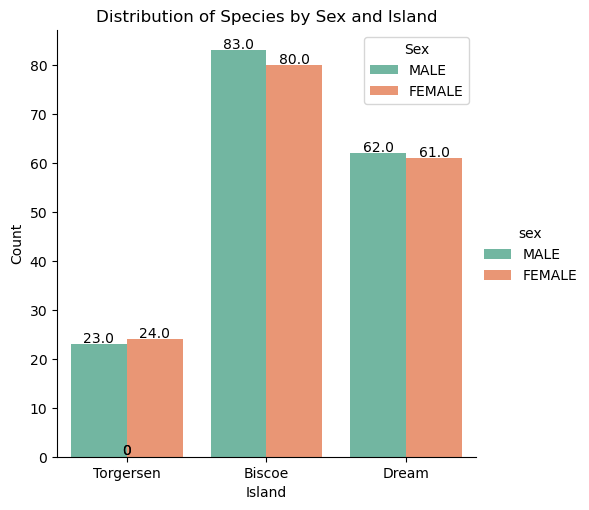

In [20]:
plt.figure(figsize=(5, 3))

# Grouped bar plot
sns.catplot(x='island', hue='sex', data=df, kind='count', hue_order=['MALE', 'FEMALE'], palette='Set2')
annotate_bars()
plt.title('Distribution of Species by Sex and Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

##### Penguin Distribution by Sex and Island 🐧🏝️

We observe from the graph above that the highest number of penguins is found in **Biscoe Island** 🏝️, while the lowest is in **Torgersen Island** 🏝️.

##### Insights:
- **Biscoe Island**: Highest penguin population (M: 83, F: 80).
- **Biscoe Island**: Moderate penguin population (M: 62, F: 61).
- **Torgersen Island**: Lowest penguin population(M:23, F:24).
- In all three islands, there is a slightly higher number of male penguins compared to females.

In Biscoe Island, the gender distribution is fairly balanced. Therefore, the speculation of 'More males than females' can be ruled out. 🚫👨👩

#### 3.5 Species Distribution in Biscoe island

,species,count
0,Gentoo,123
1,Adelie,44
2,Chinstrap,0


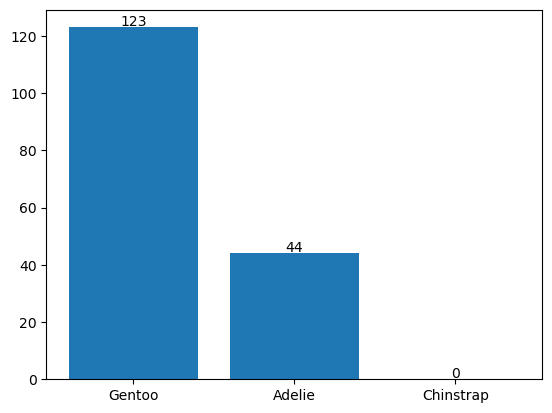

In [21]:
biscoe_species_cout = df[df['island'] == 'Biscoe']['species'].value_counts().reset_index()
plt.bar(x  = biscoe_species_cout['species'], height = biscoe_species_cout['count'])
annotate_bars()
biscoe_species_cout

Out of 167 penguins on Biscoe Island, 123 belong to the Gentoo species, while 44 are from the Adelie species. There are no Chinstrap penguins present 🐧❌. The large number of Gentoo penguins likely explains why the penguins on Biscoe Island are heavier. 🐧📊


In [22]:
df[df['island'] == 'Biscoe'].groupby('species')['body_mass_g'].mean()

C:\Users\zhasa\AppData\Local\Temp\ipykernel_6948\2939029226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['island'] == 'Biscoe'].groupby('species')['body_mass_g'].mean()


species
Adelie       3709.659091
Chinstrap            NaN
Gentoo       5077.663934
Name: body_mass_g, dtype: float64

body_mass_g
False    282
True      61
Name: count, dtype: int64
--------------------------------------------------------------------------------
body_mass_g
False    106
True      61
Name: count, dtype: int64
--------------------------------------------------------------------------------
17.73 % of the total penguins are above 5000gm in weight
36.53 % of the total penguins in biscoe island are above 5000gm in weight
--------------------------------------------------------------------------------
Male and Female penguins ratio having weight over 5000gm in the whole dataset:
 sex
MALE      56
FEMALE     5
Name: count, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Species ration having weight over 5000gm in the whole dataset:
 species
Gentoo       61
Adelie        0
Chinstrap     0
Name: count, dtype: int64
------------------------------------------------------

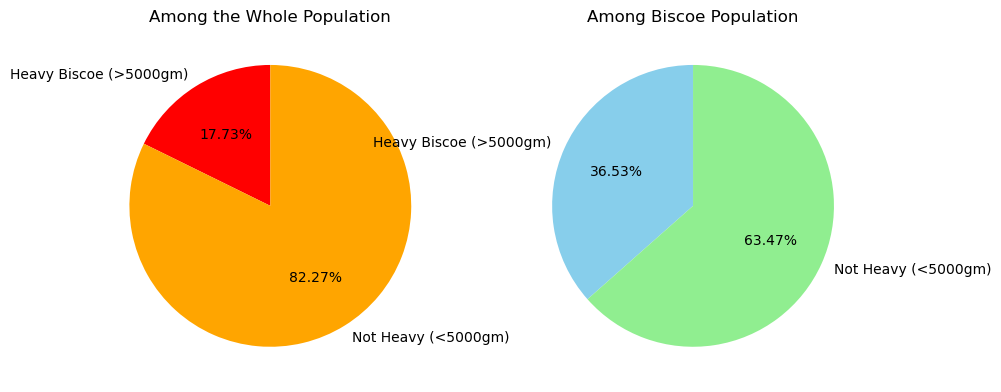

In [23]:
print((df['body_mass_g']>5000).value_counts()) #Since the average was somthing around 5000
print("--"*40)
print((df[df['island'] == 'Biscoe']['body_mass_g']>5000).value_counts())
print("--"*40)
among_the_whole_polulation = round(61/344*100,2)
print(round(61/344*100,2),"% of the total penguins are above 5000gm in weight")
among_the_biscoe = round(61/167*100,2)
print(round(61/167*100,2),"% of the total penguins in biscoe island are above 5000gm in weight")
print("--"*40)
print("Male and Female penguins ratio having weight over 5000gm in the whole dataset:\n",df[df['body_mass_g']>5000]['sex'].value_counts())
print("--"*40)
print("--"*40)
print("Species ration having weight over 5000gm in the whole dataset:\n",df[df['body_mass_g']>5000]['species'].value_counts())
print("--"*40)
#The elevated weight of penguins from Biscoe Island can be attributed to the substantial presence of Gentoo penguins, numbering 123, on this particular island.
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for the whole population
axes[0].pie([among_the_whole_polulation, 100 - among_the_whole_polulation],
            labels=['Heavy Biscoe (>5000gm)', 'Not Heavy (<5000gm)'],
            autopct='%1.2f%%',
            startangle=90,
            colors=['red', 'orange'])

axes[0].set_title('Among the Whole Population')

# Pie chart for the Biscoe population
axes[1].pie([among_the_biscoe, 100 - among_the_biscoe],
            labels=['Heavy Biscoe (>5000gm)','Not Heavy (<5000gm)'],
            autopct='%1.2f%%',
            startangle=90,
            colors=['skyblue', 'lightgreen'])

axes[1].set_title('Among Biscoe Population')

plt.show()


#### Observation: 🐧

Out of the 344 penguins in the dataset, a notable subset consists of 61 individuals with a body mass exceeding 5000 grams. Strikingly, all these weighty penguins, belonging to the enchanting `Biscoe Island`, are exclusively of the **Gentoo species**.

This observation unveils a distinct characteristic within the dataset, shedding light on a specific subgroup of Gentoo penguins with substantial body masses.

#### Additional Insight: 🚹🚺

Digging deeper into the subset of weighty penguins from Biscoe Island, a notable gender-based distinction emerges. Among the 61 heavy penguins, a staggering 56 are male, while only 5 are female. This gender imbalance within the weighty Gentoo group raises intriguing questions about potential gender-specific factors influencing body mass on Biscoe Island.

This nuanced gender distribution adds another layer to the exploration of Gentoo penguin characteristics, hinting at potential environmental or biological factors at play.

In [24]:
print("The average weight of {0} penguins is: {1}".format((df['body_mass_g']>5000).sum(),(df[df['body_mass_g']>5000]['body_mass_g']).mean()))
print("The average weight of {0} penguins is: {1}".format((df['body_mass_g']<5000).sum(),(df[df['body_mass_g']<5000]['body_mass_g']).mean()))

The average weight of 61 penguins is: 5501.639344262295
The average weight of 274 penguins is: 3892.42700729927


#### Key Observations:

- **Biscoe Island:** Biscoe Island predominantly hosts Gentoo penguins, with 123 individuals of this species. Adelie penguins are also present, numbering 44.

- **Dream Island:** Dream Island showcases a mix of Adelie, and Chinstrap penguins. Adelie and Chinstrap populations are more balanced, with 56 and 68 individuals, respectively.

- **Torgersen Island:** Torgersen Island primarily hosts Adelie penguins, with 52 individuals of this species.

This distribution provides insights into the variety of penguin species across different islands, highlighting the unique ecological niches each island offers to these fascinating birds.

<div style="border: 2px solid red; padding: 10px; border-radius: 5px; background-color:rgb(229, 16, 16);">
    <b>Final Verdict:</b> 🐧💡
    <ul>
        <li>The observed higher weight of penguins from Biscoe Island can be confidently attributed to the significant presence of Gentoo penguins, totaling 123 individuals on this island. 
            <li> Out of this 123 Gentoo penguins, the prevalence of 61 penguins with weights exceeding 5000 grams further emphasizes the impact of this species on the island's weight profile. </li>
        <li>This distinct feature provides a key insight into the weight distribution among penguins, highlighting the influence of Gentoo species on the overall mass characteristics in Biscoe.</li>
    </ul>
</div>

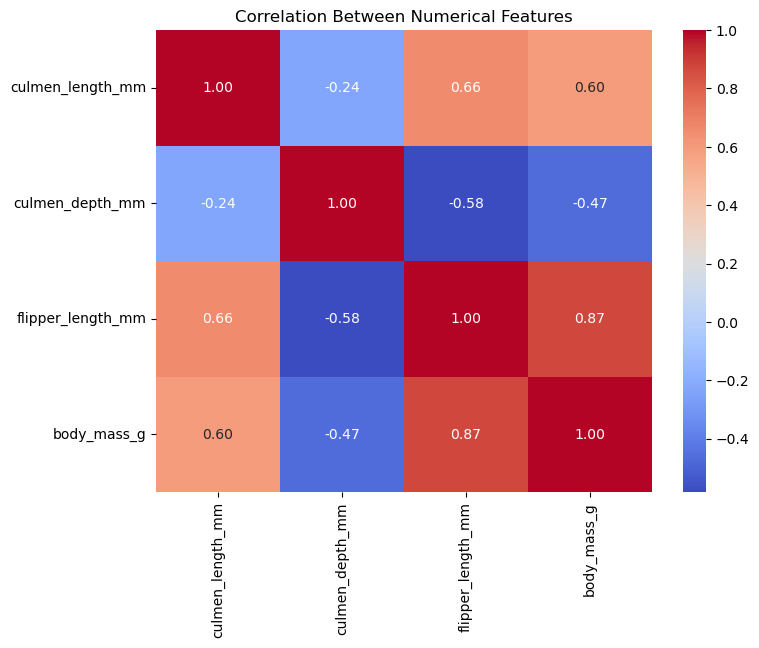

In [26]:
num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()
